In [5]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from mendeleev import element

In [42]:
dataframe = pd.read_csv('Oxides_firstnumpy.csv')

In [43]:
np.shape(dataframe)

(743, 5)

In [44]:
dataframe

,Atom1,Atom2,Atom3,Atom4,Perovskite_label
0,3,23,32,8,0
1,55,13,14,8,0
2,20,27,74,8,1
3,47,23,33,8,0
4,38,30,34,8,0
...,...,...,...,...,...
738,38,21,76,8,1
739,11,31,52,8,0
740,38,49,51,8,1
741,20,28,14,8,0


In [60]:
dataframe23 = pd.read_csv('name_Oxides_firstnumpy.csv')

In [61]:
dataframe23

,Atom1,Atom2,Atom3,Atom4,Perovskite_label
0,Y,Ni,Mn,O,1
1,Ba,La,Ru,O,1
2,Sr,Ho,Mo,O,1
3,Sr,Dy,Mo,O,1
4,Sr,Gd,Mo,O,1
...,...,...,...,...,...
738,Na,Cr,Ge,O,0
739,K,Gd,Si,O,0
740,Li,La,C,O,0
741,La,Zn,Ti,O,0


In [62]:
NN_final = dataframe23

NN_final['Ionic1'] = 0 
NN_final['Ionic2'] = 0 
NN_final['Ionic3'] = 0 
NN_final['Ionic4'] = 0 

In [63]:
NN_final = NN_final.reindex(columns=['Atom1', 'Atom2', 'Atom3', 'Atom4', 'Ionic1',
       'Ionic2', 'Ionic3', 'Ionic4', 'Perovskite_label'])

In [67]:
NN_final.columns

Index(['Atom1', 'Atom2', 'Atom3', 'Atom4', 'Ionic1', 'Ionic2', 'Ionic3',
       'Ionic4', 'Perovskite_label'],
      dtype='object')

In [68]:
for l in range(len(NN_final)):
    NN_final.Ionic1.iloc[l] = element(dataframe23.Atom1.iloc[l]).atomic_radius
    NN_final.Ionic2.iloc[l] = element(dataframe23.Atom2.iloc[l]).atomic_radius
    NN_final.Ionic3.iloc[l] = element(dataframe23.Atom3.iloc[l]).atomic_radius
    NN_final.Ionic4.iloc[l] = element(dataframe23.Atom4.iloc[l]).atomic_radius

    #this step takes a lot of time why ?

NN_final


/opt/miniconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Atom1,Atom2,Atom3,Atom4,Ionic1,Ionic2,Ionic3,Ionic4,Perovskite_label
0,Y,Ni,Mn,O,180,135,140,60,1
1,Ba,La,Ru,O,215,195,130,60,1
2,Sr,Ho,Mo,O,200,175,145,60,1
3,Sr,Dy,Mo,O,200,175,145,60,1
4,Sr,Gd,Mo,O,200,180,145,60,1
...,...,...,...,...,...,...,...,...,...
738,Na,Cr,Ge,O,180,140,125,60,0
739,K,Gd,Si,O,220,180,110,60,0
740,Li,La,C,O,145,195,70,60,0
741,La,Zn,Ti,O,195,135,140,60,0


In [77]:
for l in range(len(NN_final)):
    NN_final.Atom1.iloc[l] = element(NN_final.Atom1.iloc[l]).atomic_number
    NN_final.Atom2.iloc[l] = element(NN_final.Atom2.iloc[l]).atomic_number
    NN_final.Atom3.iloc[l] = element(NN_final.Atom3.iloc[l]).atomic_number
    NN_final.Atom4.iloc[l] = element(NN_final.Atom4.iloc[l]).atomic_number
    
    #this step takes a lot of time why ?

#NN_final

/opt/miniconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [78]:
NN_final.to_csv('Oxides_Ionic.csv', index=False)

In [79]:
dataframe = NN_final

In [80]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers

In [1]:
#Dependencies
import numpy as np
import pandas as pd
#dataset import
dataset = pd.read_csv('Oxides_Ionic.csv') #You need to change #directory accordingly
dataset.head(10) #Return 10 rows of data

,Atom1,Atom2,Atom3,Atom4,Ionic1,Ionic2,Ionic3,Ionic4,Perovskite_label
0,39,28,25,8,180,135,140,60,1
1,56,57,44,8,215,195,130,60,1
2,38,67,42,8,200,175,145,60,1
3,38,66,42,8,200,175,145,60,1
4,38,64,42,8,200,180,145,60,1
5,38,63,42,8,200,185,145,60,1
6,56,57,73,8,215,195,145,60,1
7,20,28,74,8,180,135,135,60,1
8,57,11,73,8,195,180,145,60,1
9,38,12,52,8,200,150,140,60,1


<AxesSubplot:>

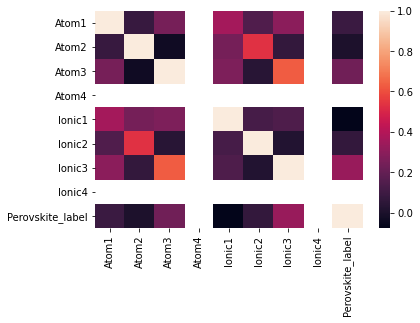

In [2]:
import seaborn as sns
import matplotlib as plt
corr = dataset.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [3]:
#Changing pandas dataframe to numpy array
X = dataset.iloc[:,:8].values
y = dataset.iloc[:,8:9].values

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [5]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

max_abs_scaler = preprocessing.MaxAbsScaler()
X_train = max_abs_scaler.fit_transform(X_train)

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras import regularizers

# Neural network

model = Sequential()

model.add(Dense(100, activation='relu', input_shape=(8,)))

model.add(Dropout(0.18))

model.add(Dense(150, activation='relu', kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01)))

model.add(Dropout(0.1))

model.add(Dense(50, activation='relu', kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01)))

model.add(Dropout(0.15))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
            
history = model.fit(X_train, y_train, epochs=100, batch_size=5, verbose=1,validation_data=(X_test,y_test))
model.evaluate(X_test, y_test)[1]


ModuleNotFoundError: No module named 'keras'

In [2]:
model.evaluate(X, y)

NameError: name 'model' is not defined